In [2]:
import numpy as np
import os
import sys
sys.path.append("../utils")
from metric import calculate_metric
from json_tools import get_from_pool
from pool_iterator import pool_iterator

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def eval_on_day(day, positions):
    data_folder = "../../../data/new_days_data_best_features//"
    json_filename = os.path.join(data_folder, "day_{}.json".format(day))
    pool_positions = get_from_pool(pool_iterator(json_filename), "pos", int)
    pool_probs = get_from_pool(pool_iterator(json_filename), "p")
    pool_targets = get_from_pool(pool_iterator(json_filename), "target", int)
    return calculate_metric(
        positions,
        pool_positions,
        pool_targets,
        pool_probs
    )

In [4]:
x = np.load("res/train_3_test_6.npy")

In [ ]:
def get_positions(scores):
    

In [7]:
x

array([[0.80860991, 0.81449919, 0.81474932, ..., 0.81365689, 0.81416775,
        0.81146317],
       [0.79542404, 0.80147687, 0.8012288 , ..., 0.79878172, 0.80063883,
        0.79449726],
       [0.51033806, 0.51864286, 0.51889299, ..., 0.51931345, 0.51905381,
        0.51559963],
       ...,
       [0.67678093, 0.68261088, 0.682861  , ..., 0.68339279, 0.68340295,
        0.68188452],
       [0.65341639, 0.65908118, 0.65861657, ..., 0.65999   , 0.65903578,
        0.65864688],
       [0.74294024, 0.74832096, 0.74857108, ..., 0.74807761, 0.74858847,
        0.74639247]])

In [19]:
from collections import Counter
Counter(np.argmax(x, axis=1))

Counter({4: 94707,
         5: 10265,
         3: 7997,
         7: 10477,
         2: 1780,
         10: 1449,
         9: 7599,
         1: 1811,
         8: 3320,
         0: 2893})

In [6]:
eval_on_day(6, np.argmax(x, axis=1))

0.6250772076889952

In [9]:
res = []
for i in range(len(x[0])):
    indices = list(range(max(i - 1, 0), min(i + 2, len(x[0]))))
    average = 0
    counter = 0
    for ind in indices:
        average += x[0][ind]
        counter += 1
    average /= counter
    res.append(average)

In [10]:
res

[0.8115545483536365,
 0.8126194719961659,
 0.81494756799519,
 0.8154902566941372,
 0.8155279102910434,
 0.8152839392462262,
 0.8145161026385686,
 0.8141143056425809,
 0.8138827942793379,
 0.8130959361660887,
 0.8128154597071426]

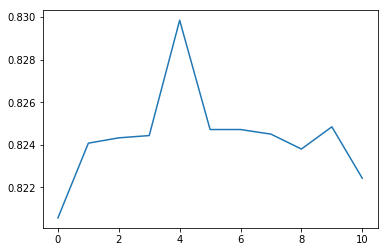

In [21]:
plt.plot(x[90])